This code is meant to do numerous simulations. Then, it will not display any video, just the final plot for the cross section. That's why every code line related to ploting the particles have been removed, and the particles only have five properties.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from matplotlib import animation
import time

In [26]:
def initial_loc_vel_assigner(Natoms, targets, p1, p2, m1, m2, r1, r2, q1, q2):
    particles_properties = {i:[] for i in range(Natoms)}
    for i in range(Natoms):
        x = np.random.normal(loc = 0.0, scale = Rbeam)
        y = np.random.normal(loc = 0.0, scale = Rbeam)
        z = np.random.normal(loc = 0.0, scale = Rbeam)
        if i < Natoms-targets:
            particles_properties[i] = [np.array([x-L, y, z]), np.array([p1, 0, 0]), m1, r1, q1]
        else:
            particles_properties[i] = [np.array([x+L, y, z]), np.array([p2, 0, 0]), m2, r2, q2]
    return particles_properties

In [27]:
def checkCollisions(Natoms, particles_properties):
    hitlist = []
    for i in particles_properties:
        ai = particles_properties[i][0]
        for j in particles_properties:
            if j <i:
                aj = particles_properties[j][0]
                r2 = particles_properties[j][3] + particles_properties[i][3]
                dr = ai - aj
                if np.linalg.norm(dr) < r2: hitlist.append([i,j])
    return np.array(hitlist)

In [28]:
def pos_update(particles_properties):
    global colisions
    
    for i in particles_properties:
        particles_properties[i][0] = particles_properties[i][0] + dt*particles_properties[i][1]/particles_properties[i][2]
        particles_properties[i][1] = particles_properties[i][1] + dt*lorentz_force(particles_properties[i][4], particles_properties[i][1], B, particles_properties[i][2])
        
    hitlist = checkCollisions(Natoms, particles_properties)
    
    for ij in hitlist:
        i = ij[0]
        j = ij[1]
        vrel = particles_properties[j][1]/particles_properties[j][2]-particles_properties[i][1]/particles_properties[i][2]
        rrel = particles_properties[i][0]-particles_properties[j][0]
        if np.linalg.norm(vrel)**2 == 0: continue; 
        if np.linalg.norm(rrel) > particles_properties[i][3] + particles_properties[j][3]: continue 
        colisions = colisions + 1 
        particles_properties  = colision_resolver(i, j, particles_properties) 
    return particles_properties

In [29]:
def colision_resolver(i, j, particles_properties):
    global muons
    global s
    
    ptot = particles_properties[i][1]+particles_properties[j][1]
    pos_i = particles_properties[i][0]
    pos_j = particles_properties[j][0]
    vi = particles_properties[i][1]/particles_properties[i][2]
    vj = particles_properties[j][1]/particles_properties[j][2]
    vrel = vj-vi
    rrel = pos_i-pos_j
    dx = np.dot(rrel, vrel/np.linalg.norm(vrel))
    dy = np.linalg.norm(np.cross(rrel, vrel/np.linalg.norm(vrel)))
    alpha = np.arcsin(dy/(particles_properties[i][3] + particles_properties[j][3])) 
    d = (particles_properties[i][3] + particles_properties[j][3])*np.cos(alpha)-dx 
    deltat = d/np.linalg.norm(vrel) 
    pos_i = pos_i-vi*deltat
    pos_j = pos_j-vj*deltat
    mtot = particles_properties[i][2] + particles_properties[j][2]
    pcmi = particles_properties[i][1] - ptot*particles_properties[i][2]/mtot
    pcmj = particles_properties[j][1] - ptot*particles_properties[j][2]/mtot
    rrel = rrel/np.linalg.norm(rrel)
    pcmi = pcmi-2*np.dot(pcmi, rrel)*rrel
    pcmj = pcmj-2*np.dot(pcmj, rrel)*rrel
    scm = 2*(2*np.pi*(1+np.cos(alpha)**2)/(s))*np.dot(particles_properties[i][1], particles_properties[j][1])
    if abs(scm) > 2*mu and (particles_properties[i][2] != mu and particles_properties[j][2] != mu):
        muons = muons + 1
        particles_properties[i][2] = mu
        particles_properties[j][2] = mu
        particles_properties[i][3] = Ru
        particles_properties[j][3] = Ru
        particles_properties[i][1] = pcmi + ptot*particles_properties[i][2]/mtot - mu
        particles_properties[j][1] = pcmj + ptot*particles_properties[j][2]/mtot - mu
    else:
        particles_properties[i][1] = pcmi + ptot*particles_properties[i][2]/mtot
        particles_properties[j][1] = pcmj + ptot*particles_properties[j][2]/mtot 
    particles_properties[i][0] = pos_i + (particles_properties[i][1]/particles_properties[i][2])*deltat 
    particles_properties[j][0] = pos_j + (particles_properties[j][1]/particles_properties[j][2])*deltat
    return particles_properties

In [30]:
def lorentz_force(q, p, B, mass):
    v = p/mass
    return q * np.cross(v, B)

In [31]:
# All the variables are the same and have been explained already
Natoms = 1000
targets = int(Natoms/2)

Rbeam = 0.5
L = 5

me = 1
mu = 2
Re = 0.1
Ru = 0.1
q1 = -1
q2 = 1 

B = np.array([0, 0, 0.06])
q = 1

Now we are computing for s = 0.02
Now we are computing for s = 0.125
Now we are computing for s = 0.5
Now we are computing for s = 1.125
Now we are computing for s = 2
Now we are computing for s = 3.125
Now we are computing for s = 4.5
Now we are computing for s = 6.125
Now we are computing for s = 8
Now we are computing for s = 12.5
Now we are computing for s = 24.5
Now we are computing for s = 32
Now we are computing for s = 50
Now we are computing for s = 72
It took 745.059 s to solve 


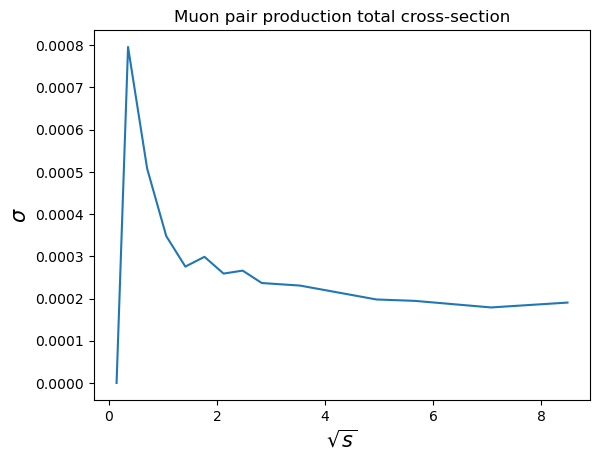

In [33]:
start = time.time()

# All the initial momentums we want to simulate
momentum = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3.5, 4, 5, 6]

S = []  # List to store calculated values of s
CS = []  # List to store computed cross-section values

# Loop through different momentum values
for p in momentum:
    s = 2*(p**2) # Calculate the value of s for each momentum
    print('Now we are computing for s = %lg' %(2*(p**2))) # Print the current s value we are computing for
    
    # Initialize global variables for collisions and muons
    global colisions
    global muons
    
    S.append(s) # Append the calculated s value to the list
    
    Natoms = 1000
    
    p1 = p # Momentum for beam 1
    p2 = -p # Momentum for beam 2
    
    dt = 2*Re*me/p1
    T = int(((2*L-2*Rbeam)*me/(p1*dt)))
    
    particles_properties = initial_loc_vel_assigner(Natoms, targets, p1, p2, me, me, Re, Re, q1, q2)
    
    hitlist = checkCollisions(Natoms, particles_properties)
    
    if len(hitlist) > 0:
        for i in hitlist[:,0]: 
            if i in particles_properties: 
                particles_properties.pop(i) 
                
    Natoms = len(particles_properties)
        
    colisions = 0
    muons = 0
        
    # Simulate the movement and interactions of particles for a certain number of time steps
    for t in range(T):
        particles_properties = pos_update(particles_properties)
    
    # Calculate cross-section based on muons produced and collisions
    if colisions == 0:
        CS.append(0)
    else:
        CS.append((muons*np.pi*Rbeam**2)/(colisions*Natoms))
        
end = time.time()
print('It took %lg s to solve ' %(end - start))

plt.plot(np.sqrt(S), CS)
plt.xlabel(r'$\sqrt{s}$', fontsize = 15)
plt.ylabel(r'$\sigma$', fontsize = 15)
plt.title('Muon pair production total cross-section')
plt.show()